# Models benchmark

## Imports

In [10]:
import os
from utils import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

In [11]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []
MODELS_5R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"2R Model found : {filename}")
                MODELS_2R.append(model)
            elif '3R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"3R Model found : {filename}")
                MODELS_3R.append(model)
            elif '5R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"5R Model found : {filename}")
                MODELS_5R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")
print(f"Number of 5R models : {len(MODELS_5R)}")

2R Model found : NN1_2R_p10.0_e30.keras
5R Model found : NN1_5R_p80.0_e50.keras
3R Model found : NN1_3R_p10.0_e30_raw.keras
5R Model found : NN1_5R_p80.0_e50_raw.keras
2R Model found : NN1_2R_p10.0_e30_raw.keras
3R Model found : NN1_3R_p10.0_e30.keras
Number of 2R models : 2
Number of 3R models : 2
Number of 5R models : 2


Example with (j0, j1) = (0, 0)
End-effector predicted X-position: 0.19821085035800934
End-effector predicted Y-position: 0.013980912044644356


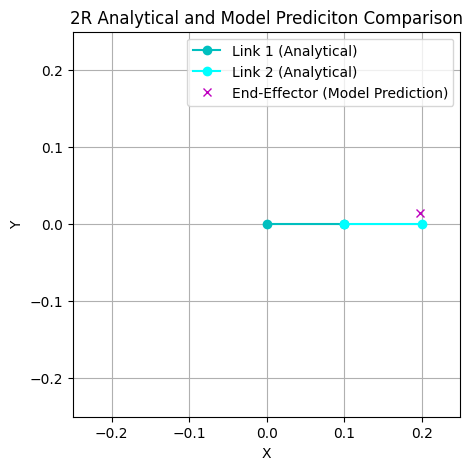

Distance error: 0.014094926677408328

Example with (j0, j1) = (1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.12862075865268707
End-effector predicted Y-position: 0.1230379194021225


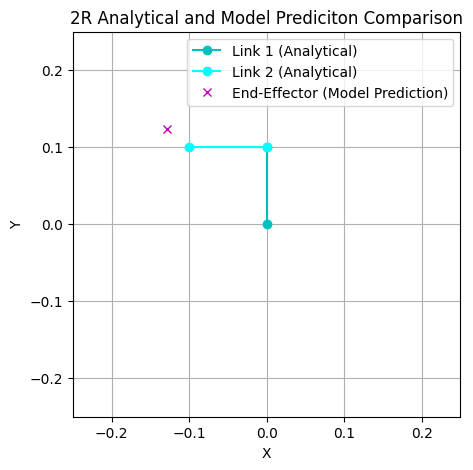

Distance error: 0.03674089759701106

Example with (j0, j1) = (1.5707963267948966, 0.7853981633974483)
End-effector predicted X-position: -0.08061546087265015
End-effector predicted Y-position: 0.17527629435062408


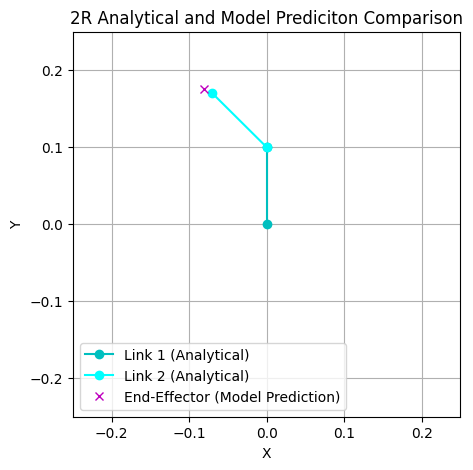

Distance error: 0.010906400551119806



In [12]:
model_2R = MODELS_2R[1].model
name_2R = MODELS_2R[1].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0), (np.pi/2, np.pi/2), (np.pi/2, np.pi/4)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_2R, theta, raw)
    print(f"Example with (j0, j1) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_2R, theta, raw)  
    dispFK_2R(result_model, theta, display_error=True)

In [13]:
# y_pred_test = model_2R.predict(X_2R_test)
# print(f"Mean absolute error: {mean_absolute_error(y_2R_test, y_pred_test)}")

In [14]:
theta = [np.pi/4, np.pi/2]  

learned_J = FK_Jacobian_pred(model_2R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_2R(theta)
print(f"Jacobian Matrix analytical:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.08829163 -0.09173331]
 [ 0.02227461 -0.08570047]]
Jacobian Matrix analytical:
[[-0.08829163 -0.09173331]
 [ 0.02227461 -0.08570047]]


Example with (j0, j1, j2) = (0, 0, 0)
End-effector predicted X-position: 0.31418636441230774
End-effector predicted Y-position: -0.00013918988406658173


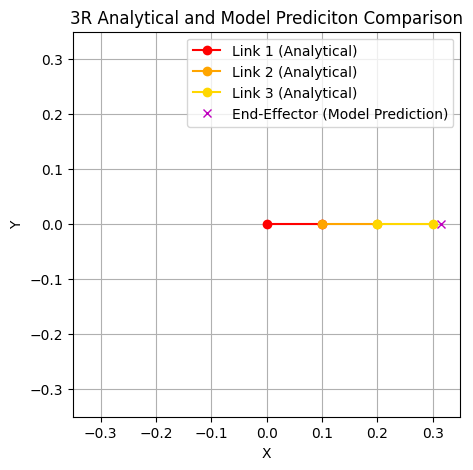

Distance error: 0.01418704722846219

Example with (j0, j1, j2) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483)
End-effector predicted X-position: -0.000886143185198307
End-effector predicted Y-position: 0.24858282506465912


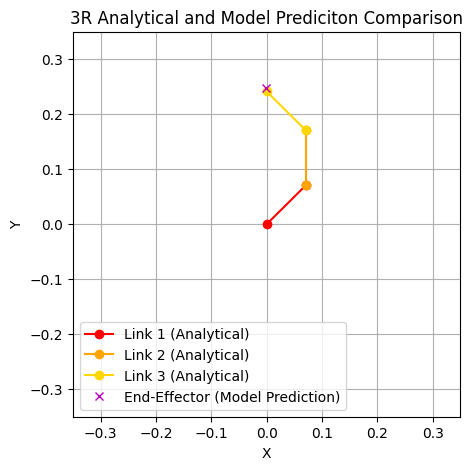

Distance error: 0.007216085192801788

Example with (j0, j1, j2) = (0, 1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.010443625040352345
End-effector predicted Y-position: 0.10724771022796631


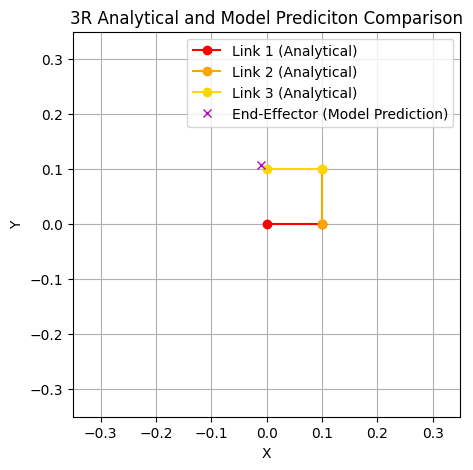

Distance error: 0.012712144096573232



In [15]:
model_3R = MODELS_3R[1].model
name_3R = MODELS_3R[1].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0), (np.pi/4, np.pi/4, np.pi/4), (0, np.pi/2, np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_3R, theta, raw)
    print(f"Example with (j0, j1, j2) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_3R, theta, raw)  
    dispFK_3R(result_model, theta, display_error=True)


In [16]:
theta = [np.pi/4, np.pi/5, np.pi/4]  

learned_J = FK_Jacobian_pred(model_3R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_3R(theta)
print(f"Jacobian Matrix analytical:\n{analytical_J}")


Jacobian Matrix predicted:
[[-0.30391198 -0.16905375 -0.0597119 ]
 [ 0.02740147 -0.06629705 -0.06141986]]
Jacobian Matrix analytical:
[[-0.25038121 -0.17967053 -0.0809017 ]
 [ 0.0275756  -0.04313508 -0.05877853]]


In [17]:
model_5R = MODELS_5R[1].model
name_5R = MODELS_5R[1].get_name()

if 'raw' in name_5R:
    raw = True
else: 
    raw = False

THETA_LST = [(0, 0, 0, 0, 0), (np.pi/4, np.pi/4, np.pi/4, np.pi/4, -np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred, ee_z_pred = FK(model_5R, theta, raw)
    print(f"Example with (j0, j1, j2, j3, j4) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    print(f"End-effector predicted Z-position: {ee_z_pred}")
    print("\n")

Example with (j0, j1, j2, j3, j4) = (0, 0, 0, 0, 0)
End-effector predicted X-position: 0.003039564937353134
End-effector predicted Y-position: 0.001871524378657341
End-effector predicted Z-position: 0.5948976874351501


Example with (j0, j1, j2, j3, j4) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, -1.5707963267948966)
End-effector predicted X-position: 0.11073409020900726
End-effector predicted Y-position: 0.28053101897239685
End-effector predicted Z-position: 0.13393455743789673




In [18]:
theta = [np.pi/4, np.pi/2, np.pi/4, np.pi/4, np.pi/4]  

learned_J = FK_Jacobian_pred(model_5R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

Jacobian Matrix predicted:
[[-5.69034666e-02 -1.58775195e-01 -1.63147613e-01 -1.15214780e-01
   1.97473317e-02]
 [ 1.98612690e-01 -2.43218660e-01 -2.53801525e-01 -1.74007148e-01
  -6.98853210e-02]
 [-1.74871441e-02 -1.75067872e-01 -7.20546246e-02  2.06666067e-04
   1.04547784e-01]]
